In [96]:
import sklearn
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import regularizers
from keras.utils import image_dataset_from_directory
import keras
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [54]:
import splitfolders 
input_folder = "E:/Big Projects/RPS/rps-cv-images"
output = "E:/Big Projects/RPS/Split_Data"

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .15, .15))


Copying files: 0 files [00:00, ? files/s]
Copying files: 21 files [00:00, 209.95 files/s]
Copying files: 82 files [00:00, 444.04 files/s]
Copying files: 127 files [00:00, 241.74 files/s]
Copying files: 159 files [00:00, 138.59 files/s]
Copying files: 181 files [00:01, 110.95 files/s]
Copying files: 198 files [00:01, 100.34 files/s]
Copying files: 212 files [00:01, 93.08 files/s] 
Copying files: 224 files [00:01, 86.19 files/s]
Copying files: 234 files [00:02, 81.84 files/s]
Copying files: 243 files [00:02, 77.69 files/s]
Copying files: 252 files [00:02, 67.09 files/s]
Copying files: 259 files [00:02, 65.71 files/s]
Copying files: 266 files [00:02, 64.67 files/s]
Copying files: 274 files [00:02, 64.55 files/s]
Copying files: 281 files [00:02, 64.60 files/s]
Copying files: 289 files [00:02, 66.55 files/s]
Copying files: 296 files [00:03, 65.15 files/s]
Copying files: 305 files [00:03, 71.00 files/s]
Copying files: 313 files [00:03, 70.93 files/s]
Copying files: 321 files [00:03, 71.84 f

In [109]:
labels = ['rock', 'paper', 'scissors']
label_binarizer = LabelBinarizer()
one_hot_labels = label_binarizer.fit_transform(labels)

print(one_hot_labels.shape)

(3, 3)


In [100]:
datagen = ImageDataGenerator(
    rescale=1./255,           # rescale pixel values to 0-1 range
    rotation_range=20,        # randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # randomly shift images vertically by up to 20% of the height
    shear_range=0.2,          # randomly apply shearing transformation
    zoom_range=0.2,           # randomly zoom in on images
    horizontal_flip=True,     # randomly flip images horizontally
    fill_mode='nearest'       # fill in any pixels that might be lost due to transformations
)

In [114]:
train_dir = 'E:/Big Projects/RPS/Split_Data/train'
train_generator = datagen.flow_from_directory(
    train_dir,                # path to the training data directory
    target_size=(150, 150),   # resize images to 150x150 pixels
    batch_size=32,            # number of samples per batch
    class_mode='categorical'       # type of classification (binary or categorical)
)

Found 1531 images belonging to 3 classes.


In [125]:
test_dir = 'E:/Big Projects/RPS/Split_Data/test'
test_generator = datagen.flow_from_directory(
    train_dir,                # path to the training data directory
    target_size=(150, 150),   # resize images to 150x150 pixels
    batch_size=32,            # number of samples per batch
    class_mode='categorical'       # type of classification (binary or categorical)
)

Found 1531 images belonging to 3 classes.


In [115]:
val_dir = 'E:/Big Projects/RPS/Split_Data/val'
val_generator = datagen.flow_from_directory(
    train_dir,                # path to the training data directory
    target_size=(150, 150),   # resize images to 150x150 pixels
    batch_size=32,            # number of samples per batch
    class_mode='categorical'       # type of classification (binary or categorical)
)

Found 1531 images belonging to 3 classes.


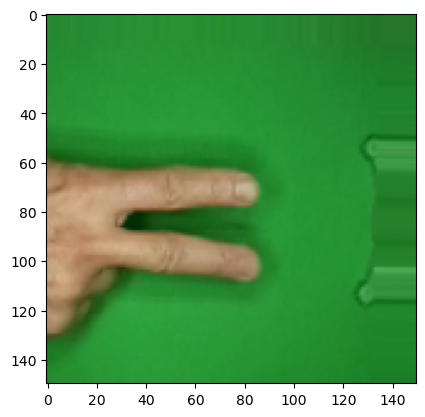

In [116]:
image,labels = next(train_generator)
plt.imshow(image[10])
plt.show()

In [117]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [118]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [119]:
history = model.fit(train_generator,
                    epochs=25,
                    verbose=1,
                    validation_data=val_generator,
                    callbacks=[learning_rate_reduction])

Epoch 1/25
48/48 [==============================] - 46s 944ms/step - loss: 1.0839 - accuracy: 0.4095 - val_loss: 1.0136 - val_accuracy: 0.4873 - lr: 0.0010
Epoch 2/25
48/48 [==============================] - 44s 910ms/step - loss: 0.9178 - accuracy: 0.5748 - val_loss: 0.6832 - val_accuracy: 0.7616 - lr: 0.0010
Epoch 3/25
48/48 [==============================] - 45s 942ms/step - loss: 0.5297 - accuracy: 0.7877 - val_loss: 0.4534 - val_accuracy: 0.8419 - lr: 0.0010
Epoch 4/25
48/48 [==============================] - 44s 917ms/step - loss: 0.4717 - accuracy: 0.8295 - val_loss: 0.5486 - val_accuracy: 0.7544 - lr: 0.0010
Epoch 5/25
48/48 [==============================] - 47s 984ms/step - loss: 0.4112 - accuracy: 0.8334 - val_loss: 0.4210 - val_accuracy: 0.8628 - lr: 0.0010
Epoch 6/25
48/48 [==============================] - 43s 895ms/step - loss: 0.4215 - accuracy: 0.8419 - val_loss: 0.3738 - val_accuracy: 0.8726 - lr: 0.0010
Epoch 7/25
48/48 [==============================] - 46s 964ms/st

48/48 [==============================] - 43s 903ms/step - loss: 0.2016 - accuracy: 0.9255 - val_loss: 0.2003 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 22/25
48/48 [==============================] - 47s 987ms/step - loss: 0.2019 - accuracy: 0.9282 - val_loss: 0.1799 - val_accuracy: 0.9419 - lr: 0.0010
Epoch 23/25
48/48 [==============================] - 48s 996ms/step - loss: 0.1633 - accuracy: 0.9543 - val_loss: 0.1229 - val_accuracy: 0.9602 - lr: 0.0010
Epoch 24/25
48/48 [==============================] - 46s 957ms/step - loss: 0.1501 - accuracy: 0.9504 - val_loss: 0.1444 - val_accuracy: 0.9484 - lr: 0.0010
Epoch 25/25
48/48 [==============================] - 43s 894ms/step - loss: 0.1324 - accuracy: 0.9523 - val_loss: 0.2405 - val_accuracy: 0.9216 - lr: 0.0010


In [120]:
model.fit(
  train_generator,
  validation_data=val_generator,
  epochs=10
)

Epoch 1/10
48/48 [==============================] - 48s 1s/step - loss: 0.1332 - accuracy: 0.9530 - val_loss: 0.0757 - val_accuracy: 0.9739
Epoch 2/10
48/48 [==============================] - 45s 938ms/step - loss: 0.1302 - accuracy: 0.9530 - val_loss: 0.1227 - val_accuracy: 0.9569
Epoch 3/10
48/48 [==============================] - 47s 974ms/step - loss: 0.1161 - accuracy: 0.9621 - val_loss: 0.1387 - val_accuracy: 0.9510
Epoch 4/10
48/48 [==============================] - 45s 942ms/step - loss: 0.1131 - accuracy: 0.9628 - val_loss: 0.0999 - val_accuracy: 0.9660
Epoch 5/10
48/48 [==============================] - 42s 881ms/step - loss: 0.0975 - accuracy: 0.9686 - val_loss: 0.0719 - val_accuracy: 0.9758
Epoch 6/10
48/48 [==============================] - 44s 916ms/step - loss: 0.0774 - accuracy: 0.9752 - val_loss: 0.0790 - val_accuracy: 0.9726
Epoch 7/10
48/48 [==============================] - 43s 899ms/step - loss: 0.0968 - accuracy: 0.9628 - val_loss: 0.0882 - val_accuracy: 0.9700
Ep

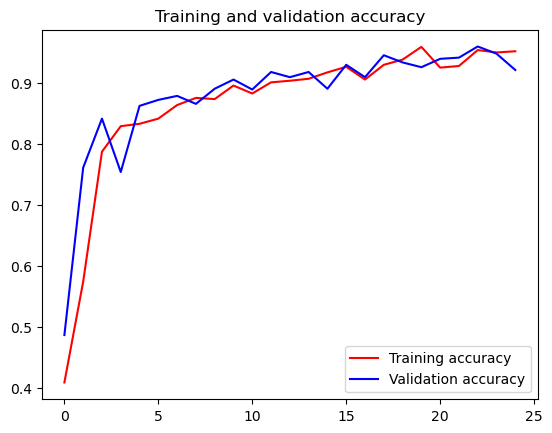

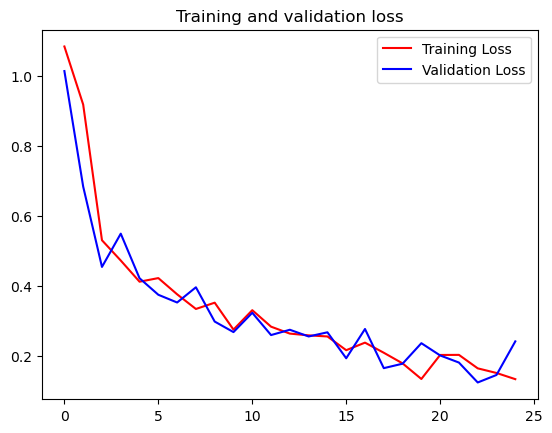

In [123]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

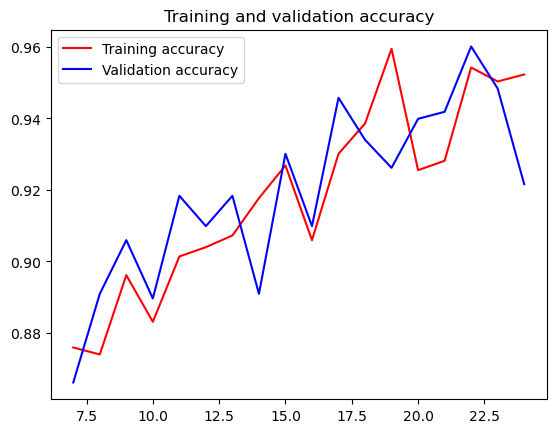

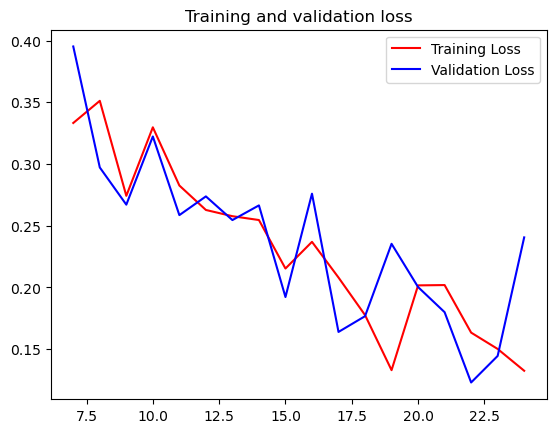

In [124]:
%matplotlib inline
acc = history.history['accuracy'][7:]
val_acc = history.history['val_accuracy'][7:]
loss = history.history['loss'][7:]
val_loss = history.history['val_loss'][7:]

epochs = range(7,7+len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()